In [ ]:
# # Define the base path to your training and validation data
# import os

# base_path = 'Desktop/pcamv1'


In [ ]:
import os

# Assuming 'base_path' should be the directory where your data files are stored
base_path = 'Desktop/pcamv1'  # Update this to the actual path

# Now define your file paths
train_x_path = os.path.join(base_path, 'camelyonpatch_level_2_split_train_x.h5')
train_y_path = os.path.join(base_path, 'camelyonpatch_level_2_split_train_y.h5')
valid_x_path = os.path.join(base_path, 'camelyonpatch_level_2_split_valid_x.h5')
valid_y_path = os.path.join(base_path, 'camelyonpatch_level_2_split_valid_y.h5')
test_x_path = os.path.join(base_path, 'camelyonpatch_level_2_split_test_x.h5')
test_y_path = os.path.join(base_path, 'camelyonpatch_level_2_split_test_y.h5')

# Print the paths to verify them
print("Train X path:", train_x_path)
print("Train Y path:", train_y_path)
print("Valid X path:", valid_x_path)
print("Valid Y path:", valid_y_path)
print("Test X path:", test_x_path)
print("Test Y path:", test_y_path)


Train X path: Desktop/pcamv1/camelyonpatch_level_2_split_train_x.h5
Train Y path: Desktop/pcamv1/camelyonpatch_level_2_split_train_y.h5
Valid X path: Desktop/pcamv1/camelyonpatch_level_2_split_valid_x.h5
Valid Y path: Desktop/pcamv1/camelyonpatch_level_2_split_valid_y.h5
Test X path: Desktop/pcamv1/camelyonpatch_level_2_split_test_x.h5
Test Y path: Desktop/pcamv1/camelyonpatch_level_2_split_test_y.h5


In [ ]:
# Function to check if a file exists at a specified path
def check_file(path):
    if os.path.exists(path):
        print(f"File exists: {path}")
    else:
        print(f"File does not exist: {path}")

check_file(train_x_path)
check_file(train_y_path)
check_file(valid_x_path)
check_file(valid_y_path)
check_file(test_x_path)
check_file(test_y_path)


File exists: Desktop/pcamv1/camelyonpatch_level_2_split_train_x.h5
File exists: Desktop/pcamv1/camelyonpatch_level_2_split_train_y.h5
File exists: Desktop/pcamv1/camelyonpatch_level_2_split_valid_x.h5
File exists: Desktop/pcamv1/camelyonpatch_level_2_split_valid_y.h5
File exists: Desktop/pcamv1/camelyonpatch_level_2_split_test_x.h5
File exists: Desktop/pcamv1/camelyonpatch_level_2_split_test_y.h5


In [ ]:
# Install TensorFlow
!pip install tensorflow


In [ ]:
import os
import numpy as np
import h5py
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.applications import DenseNet121


# Load the pre-trained DenseNet model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Make sure the base model's layers are not trainable to retain their learned features
for layer in base_model.layers:
    layer.trainable = False

# Adding new layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Add a global average pooling layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(10, activation='softmax')(x)  # Assuming 10 classes

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Model Compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Model Summary
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_6    │ (None, 102, 102,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 48, 48,    │      9,408 │ zero_padding2d_6… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 48, 48,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 48, 48,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_7    │ (None, 50, 50,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 24, 24,    │          0 │ zero_padding2d_7… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 24, 24,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 24, 24,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 24, 24,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 24, 24,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 24, 24,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 24, 24,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 24, 24,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 24, 24,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 24, 24,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 24, 24,    │     12,288 │ conv2_block2_0_r

 Total params: 8,097,354 (30.89 MB)

 Trainable params: 1,059,850 (4.04 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
# Define the chunk size
chunk_size = 1000

# Function to extract features in chunks
def extract_features_in_chunks(x_path, chunk_size, model, batch_size=32, max_samples=None):
    with h5py.File(x_path, 'r') as x_h5:
        x = x_h5['x']
        num_samples = x.shape[0]

        # Limit the number of samples if max_samples is set
        if max_samples is not None:
            num_samples = min(max_samples, num_samples)

        all_features = []
        for start_idx in range(0, num_samples, chunk_size):
            end_idx = min(start_idx + chunk_size, num_samples)
            batch_x = x[start_idx:end_idx]
            print(f"Processing batch from index {start_idx} to {end_idx}")
            features = model.predict(batch_x, batch_size=batch_size, verbose=1)
            all_features.append(features)

        return np.concatenate(all_features)

In [ ]:
# Extract features
train_features = extract_features_in_chunks(train_x_path, chunk_size, base_model, batch_size=32, max_samples=99999)
valid_features = extract_features_in_chunks(valid_x_path, chunk_size, base_model, batch_size=32, max_samples=99999)


Processing batch from index 0 to 1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 203ms/step
Processing batch from index 1000 to 2000
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step
Processing batch from index 2000 to 3000
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step
Processing batch from index 3000 to 4000
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 176ms/step
Processing batch from index 4000 to 5000
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step
Processing batch from index 5000 to 6000
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step
Processing batch from index 6000 to 7000
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step
Processing batch from index 7000 to 8000
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step
Processing batch from index 8000 to 9000
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step
Processing batch from index 9000 to 10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 176ms/step
Processing batch from index 10000 to 11000
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 176ms/step
Processing batch from index 11000 to 12000
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step
Processing bat

In [ ]:
!pip install h5py


In [ ]:
import h5py
import numpy as np

def load_labels(path, max_samples=None):
    with h5py.File(path, 'r') as h5file:
        labels = np.array(h5file['y'])
        if max_samples is not None and max_samples < len(labels):
            return labels[:max_samples]
        return labels

# Load labels with a maximum of 20000 samples
train_labels = load_labels(train_y_path, max_samples=99999)
valid_labels = load_labels(valid_y_path, max_samples=99999)

In [ ]:
train_features.shape,valid_features.shape

((99999, 3, 3, 1024), (32768, 3, 3, 1024))

In [ ]:
train_labels.shape,valid_labels.shape

((99999,), (32768,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam

def build_classifier(num_classes, input_shape):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Assuming the number of classes from your dataset
num_classes = 2  # Update this based on your dataset specifics
classifier_model = build_classifier(num_classes, train_features.shape[1:])
classifier_model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_18 (Flatten)            │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,359,809 (9.00 MB)

 Trainable params: 2,359,809 (9.00 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam

classifier_model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
]

history = classifier_model.fit(
    train_features, train_labels,
    epochs=10,
    batch_size=128,
    validation_data=(valid_features[:10000], valid_labels[:10000]),
    callbacks=callbacks
)


Epoch 1/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7074 - loss: 1.7484
Epoch 1: val_loss improved from inf to 0.45860, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.7075 - loss: 1.7465 - val_accuracy: 0.7781 - val_loss: 0.4586
Epoch 2/10
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7998 - loss: 0.4466
Epoch 2: val_loss improved from 0.45860 to 0.44618, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7998 - loss: 0.4465 - val_accuracy: 0.7901 - val_loss: 0.4462
Epoch 3/10
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8215 - loss: 0.4056
Epoch 3: val_loss improved from 0.44618 to 0.42496, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8215 - loss: 0.4056 - val_accuracy: 0.8007 - val_loss: 0.4250
Epoch 4/10
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8296 - loss: 0.3866
Epoch 4: val_loss did not improve from 0.4249

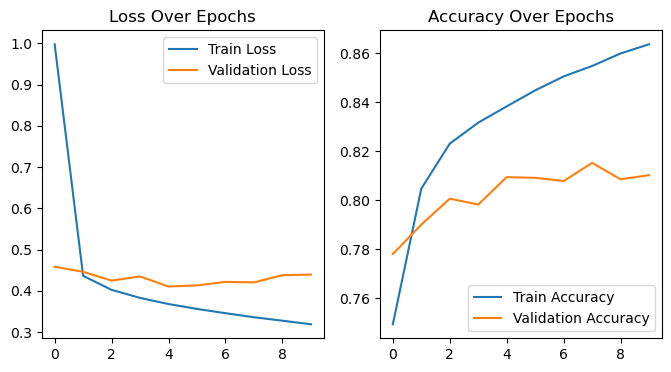

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.legend()
    plt.show()

plot_history(history)


In [ ]:
test_features,test_labels = valid_features[10000:20000],valid_labels[10000:20000]

In [ ]:
# Predict probabilities
prob_predictions = classifier_model.predict(test_features)

# Convert probabilities to class labels
class_predictions = (prob_predictions > 0.5).astype(int)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step


Confusion Matrix:
[[4416  573]
 [1370 3641]]


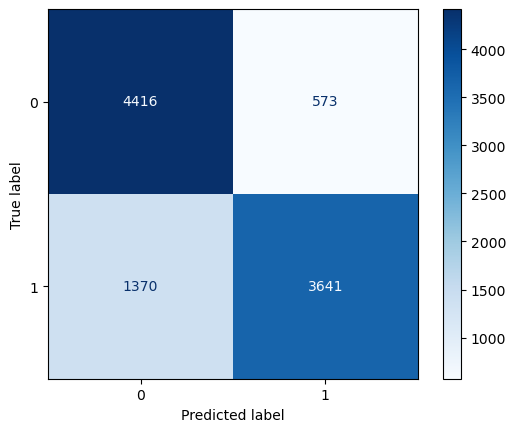

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,ConfusionMatrixDisplay
# Compute confusion matrix
cm = confusion_matrix(test_labels, class_predictions)
print("Confusion Matrix:")
print(cm)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
# Generate a classification report
report = classification_report(test_labels, class_predictions, target_names=['Negative', 'Positive'])
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

    Negative       0.76      0.89      0.82      4989
    Positive       0.86      0.73      0.79      5011

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



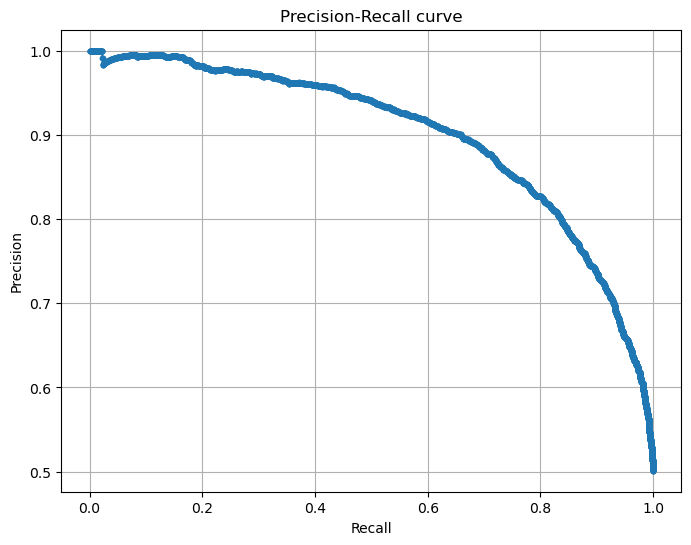

In [ ]:
# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(test_labels, prob_predictions)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [ ]:
# Predict probabilities for the positive class
prob_predictions = classifier_model.predict(test_features)[:, 0]  # Adjust index depending on your model output

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


AUC: 0.895


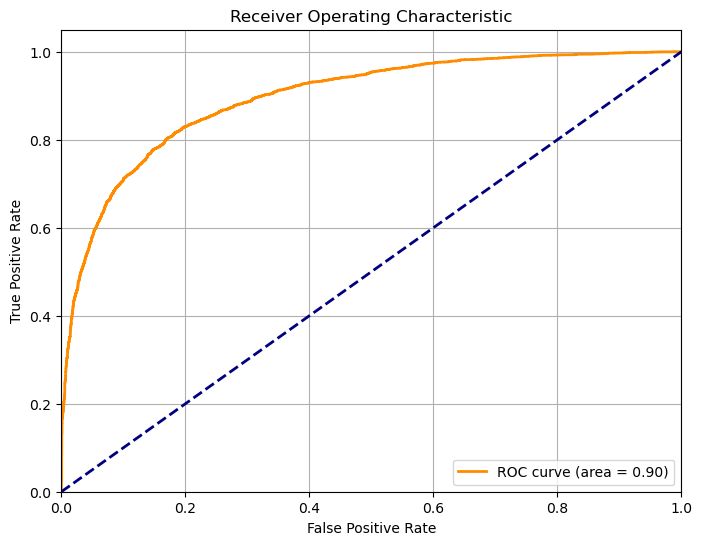

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, prob_predictions)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print("AUC: {:.3f}".format(roc_auc))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
